# Hamiltonian 

First read some libraries needed. Notice, the functions we defined for plotting phase diagrams last time.


In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 

%matplotlib inline

The routines from previous lectures.

In [32]:
def plot_flow(ax,rhs,xrange=[-2.5,2.5],yrange=[-2.5,2.5],xnum=100,ynum=100,nullclines=False):

    # Set up u,v space
    u = np.linspace(xrange[0], xrange[1], xnum)
    v = np.linspace(yrange[0], yrange[1], ynum)
    uu, vv = np.meshgrid(u, v)

# Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = rhs(0,np.array([uu[i,j], vv[i,j]]))


# Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel,color='grey')
#Nullclines
    if nullclines: 
        ax.contour(uu, vv, u_vel, [0],colors=('r'))
        ax.contour(uu, vv, v_vel, [0],colors=('b'))

    return ax

# A function that plots a path 
# def plot_solution(ax,rhs,y0,t_end,t_dim=2000,color='green',init_pt=True,linewidth=2.5):

#     t = np.linspace(0, t_end, t_dim)
#     X = sc.integrate.solve_ivp(rhs,t_span=[t[0],t[-1]],y0=y0,t_eval=t)
#     x,y=X.y
#     t=X.t
#     ax.plot(x,y, color=color,linewidth=linewidth)
#     if (init_pt):
#         ax=plot_point(ax,y0,color=color)
#     return ax

def get_solution(rhs, y0, t_end, t_dim=2000):
    t = np.linspace(0, t_end, t_dim)
    sol = sc.integrate.solve_ivp(rhs, t_span=[t[0], t[-1]], y0=y0, t_eval=t)
    return sol

def plot_solution(ax, rhs, y0, t_end, t_dim=2000, color='green', init_pt=True, linewidth=2.5, linestyle='-'):
    sol = get_solution(rhs, y0, t_end, t_dim)
    x, y = sol.y
    ax.plot(x, y, color=color, linewidth=linewidth,linestyle=linestyle)
    if init_pt:
        ax = plot_point(ax, y0, color=color)
    return ax

def plot_point(ax, coord, color='black',markersize=20):
    """Add fixed points to plot."""
    x,y=coord
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=markersize)
    return ax


def jacobian(rhs, xy, eps=1e-8):
    """
    Compute the Jacobian matrix of a system of differential equations at a given point.
    Parameters:
    rhs (function): The right-hand side function of the differential equations. It should take two arguments: time (t) and state (xy).
    xy (array-like): The point (x, y) at which to evaluate the Jacobian.
    eps (float, optional): A small perturbation value for numerical differentiation. Default is 1e-8.
    Returns:
    numpy.ndarray: A 2x2 Jacobian matrix evaluated at the point (x, y).
    Note:
    This function uses finite differences to approximate the partial derivatives.

    WARNING: The code and comment are from Gemini, use at own risk. 
    """

    
    f0 = np.array(rhs(0, xy))
    jac = np.zeros((2, 2))
    
    for i in range(2):
        dxy = np.zeros(2)
        dxy[i] = eps
        f1 = np.array(rhs(0, xy + dxy))
        jac[:, i] = (f1 - f0) / eps
    
    return jac

def eigenvalues_eigenvectors(jac):
    """
    Calculate the eigenvalues and eigenvectors of a given Jacobian matrix.
    Parameters:
    jac (numpy.ndarray): A square matrix representing the Jacobian matrix.
    Returns:
    tuple: A tuple containing two elements:
        - eigenvalues (numpy.ndarray): An array of eigenvalues.
        - eigenvectors (numpy.ndarray): An array of eigenvectors, where each column is an eigenvector corresponding to the eigenvalue at the same index.


    WARNING: The code and comment are from Gemini, use at own risk. 
    """

    eigenvalues, eigenvectors = np.linalg.eig(jac)
    return eigenvalues, eigenvectors





def plot_jordan(ax,rhs,r0=[0,0],rr=1,num=25,vectors=True, color='blue',linewidth=1.5):
    theta=np.linspace(0,2*np.pi, num)
    x=rr*np.cos(theta)+r0[0]
    y=rr*np.sin(theta)+r0[1]
    ax.plot(x,y,linewidth=linewidth, color=color)
    if vectors:
        U,V=rhs(0,[x,y])
        ax.quiver(x,y,U,V)

    return ax




def winding_number(rhs, r0, rr, num=1000):
    theta = np.linspace(0, 2 * np.pi, num)
    x = rr * np.cos(theta) + r0[0]
    y = rr * np.sin(theta) + r0[1]
    
    F,G=rhs(0,[x,y])
    angles = np.arctan2(G, F)
    integrated_angle = np.sum(np.diff(np.unwrap(angles)))
    
    return integrated_angle / (2 * np.pi)



## Hamiltonian for a Pendulum

The Hamiltonian for a pendulum is given by the following equation:

$$ H(\theta, \phi) = \frac{\phi^2}{2} - g \cdot l \cdot \cos(\theta) $$

where:
- $ \theta $ is the angular displacement.
- $ \phi $ is the angular momentum.
- $ g $ is the acceleration due to gravity.
- $ l $ is the length of the pendulum.

This Hamiltonian represents the total energy of the pendulum system, which is the sum of its kinetic and potential energies.


Figure 6.2 in Lynch

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_29037/3104203359.py:26: UserWarning: Adding colorbar to a different Figure <Figure size 2000x800 with 5 Axes> than <Figure size 2000x800 with 5 Axes> which fig.colorbar is called on.
  fig.colorbar(surface, ax=ax2)


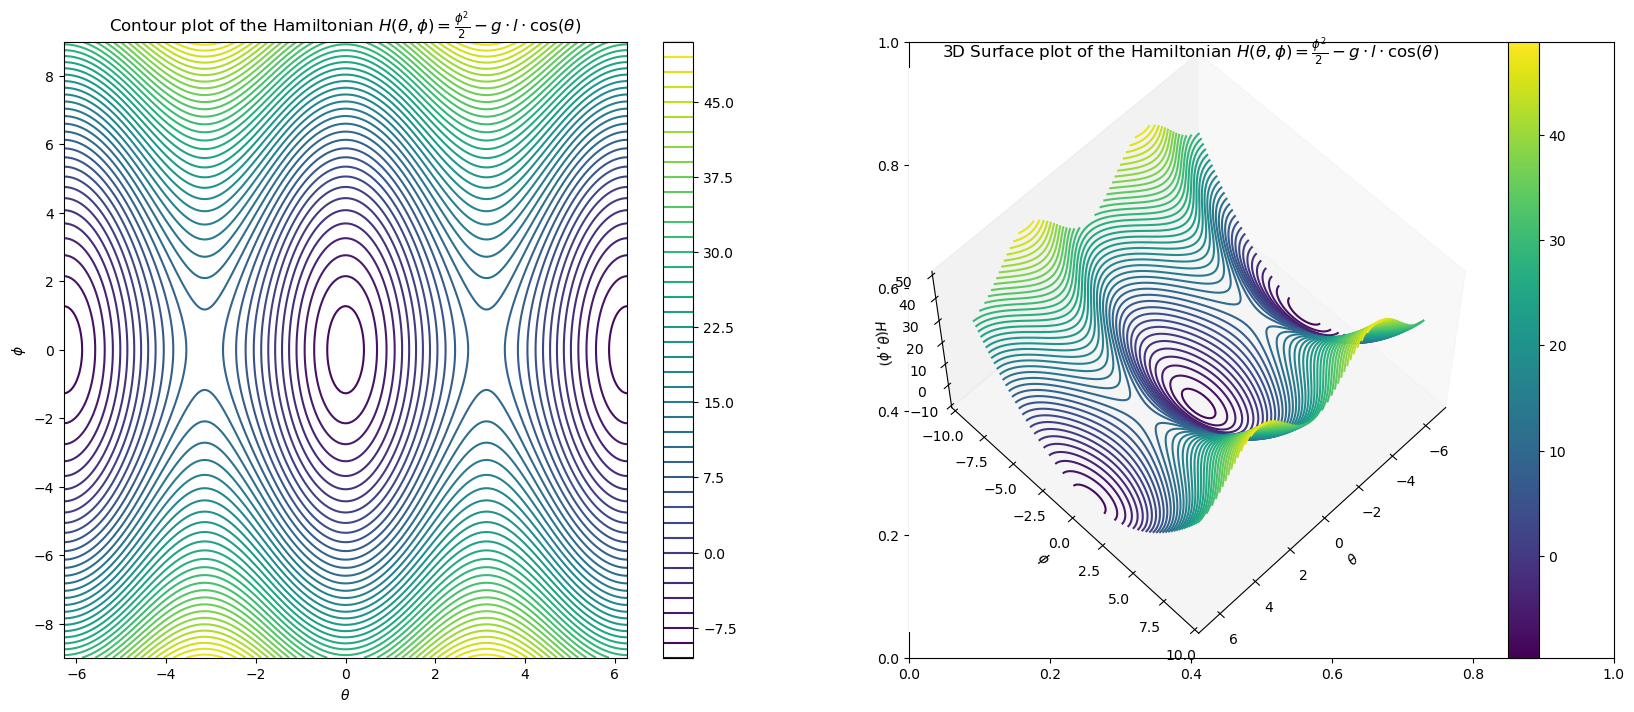

In [33]:
# Define the Hamiltonian function
def hamiltonian(theta, phi, g=9.81, l=1.0):
    return (phi**2) / 2 - g * l * np.cos(theta)

# Create a grid of theta and phi values
theta = np.linspace(-2 * np.pi, 2 * np.pi, 400)
phi = np.linspace(-9, 9, 400)
Theta, Phi = np.meshgrid(theta, phi)

# Compute the Hamiltonian values on the grid
H = hamiltonian(Theta, Phi)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the contour plot
contour = ax1.contour(Theta, Phi, H, levels=50, cmap='viridis')
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\phi$')
ax1.set_title('Contour plot of the Hamiltonian $H(\\theta, \\phi) = \\frac{\\phi^2}{2} - g \\cdot l \\cdot \\cos(\\theta)$')

# Plot the 3D surface plot
ax2 = fig.add_subplot(122, projection='3d')
#surface = ax2.plot_surface(Theta, Phi, H, cmap='viridis', edgecolor='none')
fig.colorbar(surface, ax=ax2)
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\phi$')
ax2.set_zlabel(r'$H(\theta, \phi)$')
ax2.set_title('3D Surface plot of the Hamiltonian $H(\\theta, \\phi) = \\frac{\\phi^2}{2} - g \\cdot l \\cdot \\cos(\\theta)$')

# Plot the isolines in grey color and no grid on the surface
ax2.contour(Theta, Phi, H, levels=50, zdir='z', linestyles='solid')
ax2.grid(False)
ax2.view_init(elev=60, azim=45)

plt.show()

## Example 1 a) on p149

$$
\begin{array}{l}
\dot{x} = y \\
\dot{y}= x+x^2
\end{array}
$$

- Do a linear analysis of the system
- Find a Hamiltonian function of the system. 

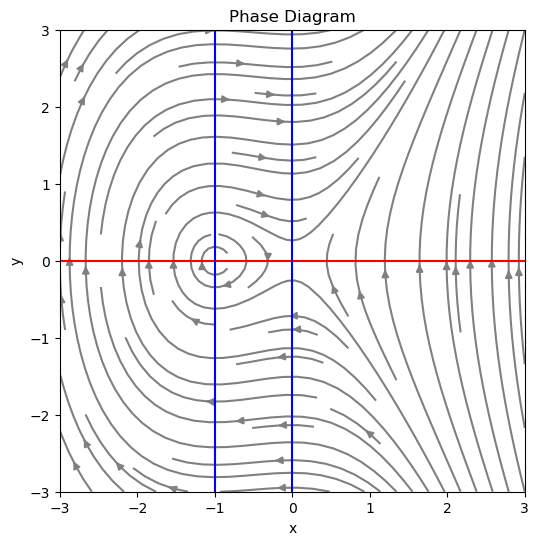

In [35]:
def rhs(t, state):
    x, y = state
    dxdt = y
    dydt = x + x**2
    return [dxdt, dydt]

fig, ax = plt.subplots(figsize=(6, 6))
ax = plot_flow(ax, rhs, xrange=[-3, 3], yrange=[-3, 3], xnum=100, ynum=100, nullclines=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Phase Diagram')
plt.show()

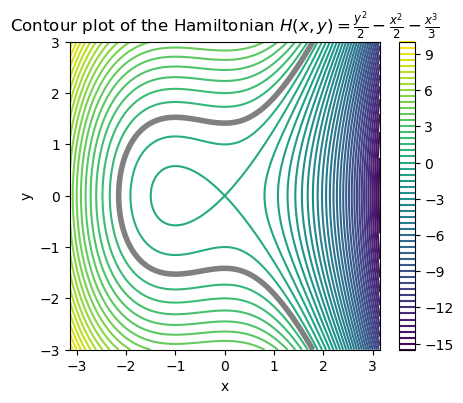

In [67]:
def hamiltonian(x, y):
    return (y**2) / 2 - (x**2) / 2 - (x**3) / 3

# Create a grid of x and y values
x = np.linspace(- np.pi,  np.pi, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# Compute the Hamiltonian values on the grid
H_new = hamiltonian(X, Y)

# Plot the contour plot
fig, ax = plt.subplots(figsize=(5, 4))
contour = ax.contour(X, Y, H_new, levels=50, cmap='viridis')
fig.colorbar(contour, ax=ax)
ax.contour(X, Y, H_new, levels=[1], colors='grey', linewidths=4)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Contour plot of the Hamiltonian $H(x, y) = \\frac{y^2}{2} - \\frac{x^2}{2} - \\frac{x^3}{3}$')
plt.show()
# Plot the contour H(x,y)=0 in grey


- Can you find the contour line that goes through the saddle point in origin? 
- How about solutions close to the critical point in $(-1,0)$?


## Example 1 b) on p149
$$
\begin{array}{l}
\dot{x}= y + x^2 − y^2\\
\dot{y}= −x − 2xy
\end{array}
$$

- Do a linear analysis of the system.
- Find a Hamiltonian function of the system. 

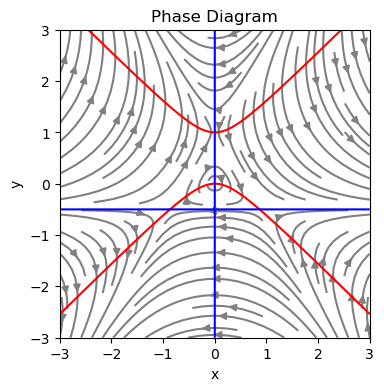

In [68]:
def rhs_new_b(t, state):
    x, y = state
    dxdt = y + x**2 - y**2
    dydt = -x - 2*x*y
    return [dxdt, dydt]

fig, ax = plt.subplots(figsize=(4, 4))
ax = plot_flow(ax, rhs_new_b, xrange=[-3, 3], yrange=[-3, 3], xnum=100, ynum=100, nullclines=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Phase Diagram')
plt.show()

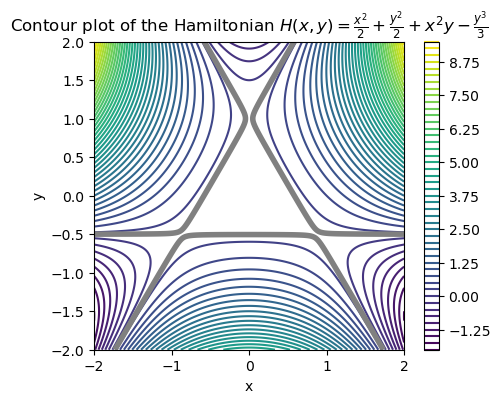

In [79]:
def hamiltonian_b(x, y):
    return x**2/2 + y**2/2 + x**2 * y - y**3/3

# Create a grid of x and y values
x = np.linspace(- 2,  2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Compute the Hamiltonian values on the grid
H_new = hamiltonian_b(X, Y)

# Plot the contour plot
fig, ax = plt.subplots(figsize=(5, 4))
contour = ax.contour(X, Y, H_new, levels=50, cmap='viridis')
fig.colorbar(contour, ax=ax)
ax.contour(X, Y, H_new, levels=[0.17], colors='grey', linewidths=4)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Contour plot of the Hamiltonian $H(x, y) = \\frac{x^2}{2} + \\frac{y^2}{2} + x^2 y - \\frac{y^3}{3}$')
plt.show()
# Plot the contour H(x,y)=0 in grey


**Definition 3 p 150. Homoclinic orbit** 

Suppose that $x_0$ is a critical point of the system 
$$ \dot{\bf x} = {\bf f} ({\bf x}), {\bf x} \in \R^2,$$
If $\Lambda^+( \gamma) = \Lambda^- ( \gamma) = x_0,$ then $\gamma$ is a homoclinic orbit.

**Definition 4 p 150. Heteroclinic orbit** 

Suppose that $x_0$ and $y_0$ are distinct critical points. If $ \Lambda^+( \gamma) = x_0 $ 
and $ \Lambda^-( \gamma) = y_0 $, then $\gamma$ is called a heteroclinic orbit.